In [3]:
!pip install numpy
!pip install pillow
!pip install matplotlib
!pip install sympy
!pip install opencv-python

You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
from matplotlib import pyplot as plt
import random
%matplotlib inline


plt.rcParams['figure.figsize'] = [18, 10] 

In [130]:
from PIL import Image
from numpy import asarray
import cv2
import math
import numpy as np
from sympy import *
# load the image

globe=cv2.imread('globe.png',0)
nautilus=cv2.imread('Nautilus.png',0)



In [137]:
globe.shape

(195, 195)

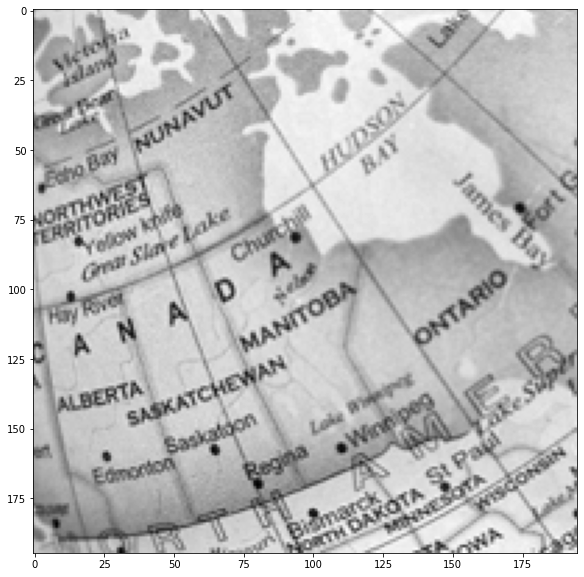

In [138]:
plt.imshow(globe,cmap="gray")

In [140]:
def gaussiankernel(sigma):
    size=math.ceil(6*sigma+1)
    #size of kernel depending upon the sigma
    if size%2==0:
        size+=1
    kernel=np.zeros((size,size))
    #intializing kernel array with zeros
    if sigma==0:
        return np.array(([0, 0, 0],[0,1,0],[0, 0, 0]), dtype="int")
    temp1=1/(2*np.pi*(sigma**2))
    temp2=2*(sigma**2)
    #the function to calculate gaussian value for each cell have certain constant accross them so computing them beforehand
    with np.nditer(kernel, flags=['multi_index'], op_flags=['writeonly']) as it:
        #iterating over numpy array on both x and y axis together to compute the array efficently
        for h in it:
            m=it.multi_index[1]
            n=it.multi_index[0]
            h[...] = temp1*np.exp(-1*((m**2)+(n**2))/temp2)
    return kernel

In [141]:
def sigmamap(img,func):
    size=img.shape[0]
    res=np.zeros((size,size))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            res[i][j]=func(i,j,size)
    return res
    

In [166]:
def convolution(img,pad,func):
    #convolution based on sigmamap
    sigmas=sigmamap(img,func)
    print(sigmas.shape)
    img=np.pad(img, (pad, pad), 'constant')
    #Zero padding the image to work around edge cases in the image
    res=np.zeros_like(img)
    #np array to store output array in
    for x in range(0,sigmas.shape[0]-1):
        for y in range(0,sigmas.shape[1]-1):
            #applying kernel on np array using slicing this allows us to reduce the length of code 
            # as well as use optimization done by numpy
            kernel=gaussiankernel(sigmas[x][y])
            size=kernel.shape[0]
            size=math.floor(size/2)
            #print(kernel.shape,size,i,j)
            i=y+50
            j=x+50
            res[j][i] = (img[j-size:j+size+1,i-size:i+size+1]*kernel).sum()
    return res[pad:sigmas.shape[1]+pad,pad:sigmas.shape[0]+pad]

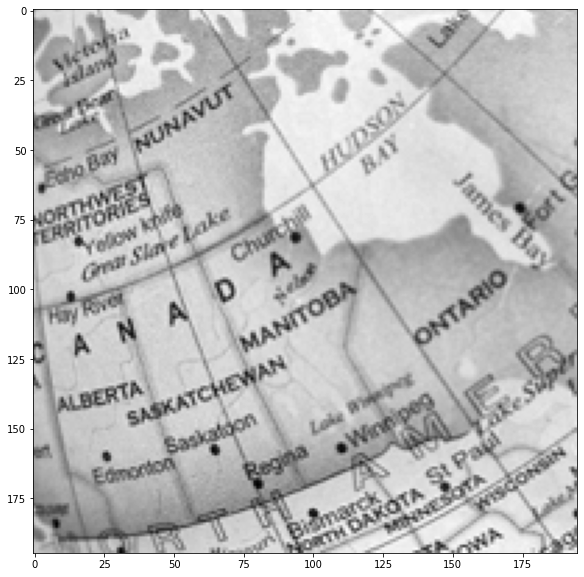

In [167]:
plt.imshow(globe,cmap="gray")

In [168]:
def func(m,n,N):
    a=2
    b=8262.711
    return (a*np.exp(-1*(((m-N/2)**2)+((n-N/2)**2))/b))

In [169]:
output=convolution(globe,50,func)

(195, 195)


In [170]:
output.shape

(195, 195)

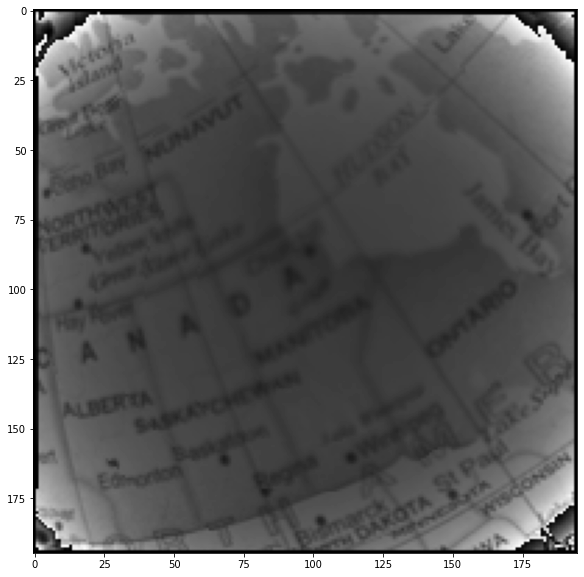

In [171]:
plt.imshow(output,cmap="gray")

In [172]:
def func(m,n,N):
    return 1

In [ ]:
output=convolution(nautilus,50,func)

(256, 256)


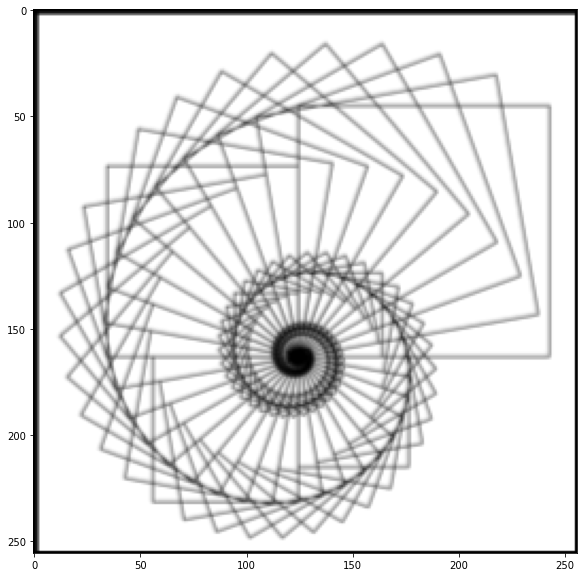

In [176]:
plt.imshow(output,cmap="gray")

In [ ]:
img=nautilus
values=[1.6,1.2]
figure, axis = plt.subplots(1, len(values)+1)
for i in range(len(values)):
    axis[i].imshow(convolution(gaussiankernel(values[i]),img,1),cmap="gray")
    title="Gaussian blur = " + str(values[i])
    axis[i].set_title(title)
axis[-1].imshow(img,cmap="gray")
axis[-1].set_title("Original")